## The X-files problem

#### Pregunta
¿Dónde debemos mandar al Strange Man para poder observar OVNI's o entrevistar personas?

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('ufo_sightings/UFO_sightings.csv')
df

/Users/demetrio/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


In [7]:
# Descripción de las variables
data_info = pd.read_excel('./ufo_sightings/data_dictionary.xlsx')
data_info

,datetime,date and time of event,String
0,city,Name of the city,String
1,state,State code of event,String
2,country,Country code of event,String
3,shape,Shape of the UFO,String
4,duration (seconds),Durantion of the sighting in seconds,Numeric
5,duration (hours/min),Durantion of the sighting in hours and minutes,String
6,comments,description of the event,String
7,date posted,Date when the event was reported,Date
8,latitude,Latitude of the city,Numeric
9,longitude,Longitude of the city,Numeric


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


## Cleaning Data

Empezamos estudiando los datos que tenemos

In [9]:
df.duplicated().value_counts()
# No hay valores duplicados

False    80332
dtype: int64

In [10]:
df.isnull().any()

datetime                False
city                    False
state                    True
country                  True
shape                    True
duration (seconds)      False
duration (hours/min)    False
comments                 True
date posted             False
latitude                False
longitude               False
dtype: bool

In [11]:
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

Entonces, tenemos valores nulos en las variables de: state(5797), country(9670), shape(1932) y comments(15).
Ahora, será necesario identificar los renglones donde estos se encuentren.

In [12]:
nan_rows = df[df.isnull().any(1)]
nan_rows

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
20,10/10/1974 21:30,cardiff (uk/wales),NaN,gb,disk,1200,20 minutes,back in 1974 I was 19 at the time and lived i...,2/1/2007,51.5,-3.200000
...,...,...,...,...,...,...,...,...,...,...,...
80254,9/9/2009 21:15,nottinghamshire (uk/england),NaN,gb,fireball,600.0,10 mins,resembled orange flame imagine a transparent h...,12/12/2009,53.166667,-1.000000
80255,9/9/2009 21:38,kaiserlautern (germany),NaN,de,light,40.0,about 40 seconds,2 white lights over Kaiserslautern&#44 ramstei...,12/12/2009,49.45,7.750000
80319,9/9/2013 20:15,clifton,nj,NaN,other,3600.0,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
80322,9/9/2013 21:00,aleksandrow (poland),NaN,NaN,light,15.0,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


Con eso, extraemos las filas con valores NaN

In [13]:
df.columns[df.isnull().any()]

Index(['state', 'country', 'shape', 'comments'], dtype='object')

Después de ver los datos y entender mejor el problema. Considero que los resultados que debemos entregar responde a las siguientes preguntas:

¿Cuáles son las ciudades, meses, y horas con mayor avistamiento? Así como sus coordenadas. Las respuestas a éstas preguntas son las que llevará a la gente al lugar indicado para obserbar OVNI's.

Analizando las columnas las variables que necesitamos estudiar son: 'datatime', 'city', 'latitude' y 'longitude' principalmente, sin embargo estos no contienen valores nulos. Entonces, podemos hacer el análisis con los datos completos.

Ahora, es necesario limpiar los datos y dejarlos con el tipo de dato más efectivo para el análisis.

### Cambiar la columna 'datetime' a tipo de dato datatime.

In [14]:
df['datetime'].sample(50)

16027     11/8/2004 18:10
44937     5/29/2009 22:00
24247     1/31/2013 12:00
32938      3/2/2013 21:00
29085     2/29/2004 23:20
4112     10/23/2010 19:45
39098     4/25/2013 09:28
5764     10/31/2004 19:15
21715    12/31/2012 22:30
20220    12/24/2005 22:00
1668     10/14/2012 15:30
67124     8/17/1987 20:00
45077     5/30/2008 22:42
39607     4/28/2013 21:20
65909     8/14/1999 22:30
36572     4/14/1981 00:00
42609     5/15/2007 23:40
33713     3/27/2002 15:00
12701    11/24/2000 01:24
25838      2/1/1996 15:00
18756    12/17/2013 13:30
60500     7/28/2013 00:00
12264    11/22/1979 23:00
4343     10/24/2011 19:00
22042     1/23/2009 21:00
12058     1/12/2008 01:30
56874     7/15/1998 14:00
54242      6/8/2000 22:15
28878     2/27/2012 03:45
54086      6/7/2004 20:00
76816     9/22/1995 05:40
127      10/10/2004 02:50
2370     10/16/2006 00:00
61907      7/4/2007 23:45
62373      7/4/2011 22:35
47986      6/1/2013 21:48
32749     3/21/2009 00:40
67083     8/16/2013 20:00
36068      4

Haciendo la conversión.

In [15]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

ParserError: hour must be in 0..23: 10/11/2006 24:00

M/D/Y H/M

El error nos indica que el intervalo para escribir la hora es de 0 a 23. Entonces, algún valor aparece como 24:00, en vez de 00:00.

Exploremos la columna, para identificar donde se encuentra.

In [16]:
pd.to_datetime(df.iloc[1:388,0])

1     1949-10-10 21:00:00
2     1955-10-10 17:00:00
3     1956-10-10 21:00:00
4     1960-10-10 20:00:00
5     1961-10-10 19:00:00
              ...        
383   2006-10-11 21:00:00
384   2006-10-11 21:20:00
385   2006-10-11 21:32:00
386   2006-10-11 22:00:00
387   2006-10-11 23:00:00
Name: datetime, Length: 387, dtype: datetime64[ns]

In [17]:
df.iloc[380:390,0]

380    10/11/2006 19:00
381    10/11/2006 19:30
382    10/11/2006 20:45
383    10/11/2006 21:00
384    10/11/2006 21:20
385    10/11/2006 21:32
386    10/11/2006 22:00
387    10/11/2006 23:00
388    10/11/2006 24:00
389    10/11/2007 04:40
Name: datetime, dtype: object

 Cambiamos el valor.

In [18]:
df.iloc[388,0] = '10/11/2006 00:00'
df.iloc[388,0]

'10/11/2006 00:00'

Ahora, ya podría convetir toda la columna datetime a tipo de dato datetime

In [19]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

ParserError: hour must be in 0..23: 10/1/2001 24:00

Al parecer, hay más valores con 24:00.
Debemos econtrarlos todos.

In [20]:
pd.to_datetime(df.iloc[1:693,0])

1     1949-10-10 21:00:00
2     1955-10-10 17:00:00
3     1956-10-10 21:00:00
4     1960-10-10 20:00:00
5     1961-10-10 19:00:00
              ...        
688   2001-10-01 20:35:00
689   2001-10-01 21:00:00
690   2001-10-01 21:00:00
691   2001-10-01 22:00:00
692   2001-10-01 22:30:00
Name: datetime, Length: 692, dtype: datetime64[ns]

In [21]:
df.iloc[690:700,0]

690    10/1/2001 21:00
691    10/1/2001 22:00
692    10/1/2001 22:30
693    10/1/2001 24:00
694    10/1/2002 00:30
695    10/1/2002 00:30
696    10/1/2002 03:00
697    10/1/2002 05:30
698    10/1/2002 05:30
699    10/1/2002 05:30
Name: datetime, dtype: object

In [22]:
df.iloc[693,0] = '10/1/2001 00:00'

In [23]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

ParserError: hour must be in 0..23: 10/1/2012 24:00

Al parecer hay muchos más valores, entonces, haré el cambio de manera general.

Encotrar todos los valores con hora dado por '24:' y cambiarlo por '00:'

In [24]:
df['datetime'] = df['datetime'].str.replace('24:','00:')

Cambiamos los '24:' a '00:' en toda la columna.

In [25]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0       1949-10-10 20:30:00
1       1949-10-10 21:00:00
2       1955-10-10 17:00:00
3       1956-10-10 21:00:00
4       1960-10-10 20:00:00
                ...        
80327   2013-09-09 21:15:00
80328   2013-09-09 22:00:00
80329   2013-09-09 22:00:00
80330   2013-09-09 22:20:00
80331   2013-09-09 23:00:00
Name: datetime, Length: 80332, dtype: datetime64[ns]

Con esto, hemos convertido a toda la columna en tipo de dato datetime.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  object        
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  object        
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 6.7+ MB


Ahora, analizemos la columna de 'city'

In [27]:
df['city'].unique()

array(['san marcos', 'lackland afb', 'chester (uk/england)', ...,
       'calmar (canada)', 'aleksandrow (poland)', 'hamstead (hollyridge)'],
      dtype=object)

In [32]:
df['city'].value_counts().head(60)

seattle                     525
phoenix                     454
portland                    374
las vegas                   368
los angeles                 353
san diego                   338
houston                     297
chicago                     265
tucson                      241
miami                       239
orlando                     220
austin                      218
springfield                 214
albuquerque                 213
sacramento                  201
columbus                    200
london (uk/england)         189
san jose                    189
san francisco               187
denver                      185
san antonio                 175
toronto (canada)            172
jacksonville                172
myrtle beach                166
dallas                      160
salem                       154
charlotte                   148
columbia                    147
new york city (brooklyn)    147
arlington                   142
mesa                        139
louisvil

In [33]:
#df['latitude'] = pd.to_numeric(df['latitude'])
df.iloc[43780:43790, 9:10]

,latitude
43780,37.7975000
43781,41.4047222
43782,33q.200088
43783,32.4366667
43784,34.7463889
43785,59.119149
43786,39.0483333
43787,32.2216667
43788,40.7544444
43789,27.0994444


Hay un error en la posición 43782. Dice '33q200088'. La latitud, son valores que van de 0 a 90, entonces esperaría que la letra 'q', sólo sea un error extra y no un número faltante. Así que, sólo lo eliminaremos.

In [34]:
df['latitude'][43782] = '33.200088'

/Users/demetrio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df['latitude'] = pd.to_numeric(df['latitude'])
df['latitude']

0        29.883056
1        29.384210
2        53.200000
3        28.978333
4        21.418056
           ...    
80327    36.165833
80328    43.613611
80329    38.297222
80330    38.901111
80331    35.652778
Name: latitude, Length: 80332, dtype: float64

Hay un espacio al final del nombre de columna longitude, así que, remplazemoslo por:

In [36]:
df['longitude'] = df['longitude ']
df['longitude']

0        -97.941111
1        -98.581082
2         -2.916667
3        -96.645833
4       -157.803611
            ...    
80327    -86.784444
80328   -116.202500
80329   -122.284444
80330    -77.265556
80331    -97.477778
Name: longitude, Length: 80332, dtype: float64

Así, terminaríamos con una tabla para las 4 variables más importantes para responder a nuestras preguntas.

In [37]:
df_new = df[['datetime', 'city', 'latitude', 'longitude']]
df_new

,datetime,city,latitude,longitude
0,1949-10-10 20:30:00,san marcos,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),53.200000,-2.916667
3,1956-10-10 21:00:00,edna,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,21.418056,-157.803611
...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,38.901111,-77.265556


Vamos a seleccionar los 100 lugares que más avistamiento ha presentado.

In [38]:
df['datetime'].dt.year.value_counts().head(50)

2012    7357
2013    7037
2011    5107
2008    4820
2009    4541
2010    4283
2007    4269
2004    4257
2005    4083
2003    3962
2006    3721
2002    3235
2001    3122
1999    2805
2000    2772
2014    2260
1998    1767
1997    1255
1995    1078
1996     834
1994     421
1978     335
1975     319
1993     309
1976     279
1974     273
1977     268
1990     259
1992     252
1989     251
1980     246
1979     245
1988     241
1991     234
1973     226
1987     223
1968     220
1985     218
1986     193
1966     193
1965     188
1967     188
1984     186
1982     183
1981     164
1972     158
1969     155
1983     153
1970     147
1971     130
Name: datetime, dtype: int64

Años con más avistamiento

In [41]:
# Ciudades con más avistamiento
df_new['city'].value_counts().head(61)

seattle        525
phoenix        454
portland       374
las vegas      368
los angeles    353
              ... 
jackson        106
lancaster      105
cincinnati     104
everett        102
wilmington     101
Name: city, Length: 61, dtype: int64

In [42]:
# Fecha con más avistamiento
df_new['datetime'].value_counts()

2010-07-04 22:00:00    36
2012-07-04 22:00:00    31
1999-11-16 19:00:00    27
2009-09-19 20:00:00    26
2011-07-04 22:00:00    25
                       ..
2006-04-23 11:00:00     1
2013-07-07 10:00:00     1
2008-11-07 18:00:00     1
2003-11-19 22:41:00     1
2000-06-16 00:05:00     1
Name: datetime, Length: 69434, dtype: int64

array([[<AxesSubplot:title={'center':'datetime'}>]], dtype=object)

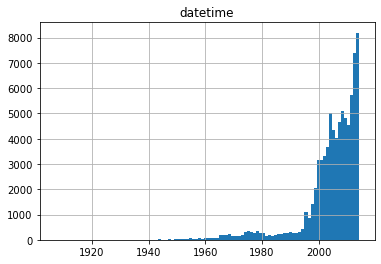

In [43]:
df.hist(column='datetime', bins=100)

Vemos que al pasar los años han aumentado el número de avistamiento.

In [46]:
df_count = df_new.groupby('city')['datetime'].count()
df_count

city
&ccedil;anakkale (turkey)                                  1
&iacute;safj&ouml;r&eth;ur (iceland)                       1
&ouml;lmstad (sweden)                                      1
1-25 corridor (southbound&#44 65 miles north nm border)    1
100 mile (canada)                                          1
                                                          ..
zuiddorpe (netherlands)                                    1
zumbrota                                                   3
zutphen (netherlands)                                      1
zwevegem (belgium)                                         1
zwolle                                                     1
Name: datetime, Length: 19900, dtype: int64

Agrupamos a las ciudades con sus números de avistamiento y fechas

In [47]:
#Obtenemos la ciudad con el mayor número de avistamiento
df_count.idxmax(axis=1)

'seattle'

In [48]:
#Obtenemos el  número de avistamiento
df_count.max()

525

In [49]:
#Enlistamos las 50 ciudades con más avistamiento
df_cities = df_count.sort_values(ascending=False).head(50)
df_cities

city
seattle                     525
phoenix                     454
portland                    374
las vegas                   368
los angeles                 353
san diego                   338
houston                     297
chicago                     265
tucson                      241
miami                       239
orlando                     220
austin                      218
springfield                 214
albuquerque                 213
sacramento                  201
columbus                    200
san jose                    189
london (uk/england)         189
san francisco               187
denver                      185
san antonio                 175
jacksonville                172
toronto (canada)            172
myrtle beach                166
dallas                      160
salem                       154
charlotte                   148
new york city (brooklyn)    147
columbia                    147
arlington                   142
mesa                        139
lou

In [870]:
 df_new.groupby('city')['datetime'].count().sort_values(ascending=False)

city
seattle                     525
phoenix                     454
portland                    374
las vegas                   368
los angeles                 353
                           ... 
indianapolis (southeast)      1
indianapolis speedway         1
indianpolis                   1
indio and san diego           1
zwolle                        1
Name: datetime, Length: 19900, dtype: int64

In [50]:
# Calculamos la propabilidad del avistamiento
(df_new.groupby('city')['datetime'].count().sort_values(ascending=False) /  df_new.groupby('city')['datetime'].count().sort_values(ascending=False).sum()) * 100

city
seattle                     0.653538
phoenix                     0.565155
portland                    0.465568
las vegas                   0.458099
los angeles                 0.439426
                              ...   
indianapolis (southeast)    0.001245
indianapolis speedway       0.001245
indianpolis                 0.001245
indio and san diego         0.001245
zwolle                      0.001245
Name: datetime, Length: 19900, dtype: float64

In [51]:
# Extramos las variables de tiempo del datetime para que nos dén mayor información
df_new['year'] = df_new['datetime'].dt.year
df_new['month'] = df_new['datetime'].dt.month
df_new['day'] = df_new['datetime'].dt.day
df_new['hour'] = df_new['datetime'].dt.time

/Users/demetrio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/demetrio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/demetrio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [52]:
df_new

,datetime,city,latitude,longitude,year,month,day,hour
0,1949-10-10 20:30:00,san marcos,29.883056,-97.941111,1949,10,10,20:30:00
1,1949-10-10 21:00:00,lackland afb,29.384210,-98.581082,1949,10,10,21:00:00
2,1955-10-10 17:00:00,chester (uk/england),53.200000,-2.916667,1955,10,10,17:00:00
3,1956-10-10 21:00:00,edna,28.978333,-96.645833,1956,10,10,21:00:00
4,1960-10-10 20:00:00,kaneohe,21.418056,-157.803611,1960,10,10,20:00:00
...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,36.165833,-86.784444,2013,9,9,21:15:00
80328,2013-09-09 22:00:00,boise,43.613611,-116.202500,2013,9,9,22:00:00
80329,2013-09-09 22:00:00,napa,38.297222,-122.284444,2013,9,9,22:00:00
80330,2013-09-09 22:20:00,vienna,38.901111,-77.265556,2013,9,9,22:20:00


Después de conocer las ciudades con más avistamiento, podemos conocer las fechas exactas de cada avistamiento y explorar los meses y horas más habituales.

In [55]:
#df_new['datetime'].where(df_new['city'] == 'seattle')
#df_new.loc[df['city']=='seattle'].count() # Da 525
df_new.loc[df['city']=='seattle']
#df_new.loc[df['city']=='miami']

,datetime,city,latitude,longitude,year,month,day,hour
113,2002-10-10 06:00:00,seattle,47.606389,-122.330833,2002,10,10,06:00:00
143,2005-10-10 07:40:00,seattle,47.606389,-122.330833,2005,10,10,07:40:00
197,2008-10-10 20:00:00,seattle,47.606389,-122.330833,2008,10,10,20:00:00
393,2007-10-11 19:50:00,seattle,47.606389,-122.330833,2007,10,11,19:50:00
685,2001-10-01 01:05:00,seattle,47.606389,-122.330833,2001,10,1,01:05:00
...,...,...,...,...,...,...,...,...
79563,2004-09-06 20:10:00,seattle,47.606389,-122.330833,2004,9,6,20:10:00
79580,2005-09-06 22:00:00,seattle,47.606389,-122.330833,2005,9,6,22:00:00
79722,2002-09-07 01:30:00,seattle,47.606389,-122.330833,2002,9,7,01:30:00
79729,2002-09-07 21:30:00,seattle,47.606389,-122.330833,2002,9,7,21:30:00


In [56]:
df_seattle = df_new.loc[df['city']=='seattle']
df_seattle

,datetime,city,latitude,longitude,year,month,day,hour
113,2002-10-10 06:00:00,seattle,47.606389,-122.330833,2002,10,10,06:00:00
143,2005-10-10 07:40:00,seattle,47.606389,-122.330833,2005,10,10,07:40:00
197,2008-10-10 20:00:00,seattle,47.606389,-122.330833,2008,10,10,20:00:00
393,2007-10-11 19:50:00,seattle,47.606389,-122.330833,2007,10,11,19:50:00
685,2001-10-01 01:05:00,seattle,47.606389,-122.330833,2001,10,1,01:05:00
...,...,...,...,...,...,...,...,...
79563,2004-09-06 20:10:00,seattle,47.606389,-122.330833,2004,9,6,20:10:00
79580,2005-09-06 22:00:00,seattle,47.606389,-122.330833,2005,9,6,22:00:00
79722,2002-09-07 01:30:00,seattle,47.606389,-122.330833,2002,9,7,01:30:00
79729,2002-09-07 21:30:00,seattle,47.606389,-122.330833,2002,9,7,21:30:00


In [57]:
print(df_seattle['month'].value_counts().head(1))
print(df_seattle['day'].value_counts().head(1))
print(df_seattle['hour'].value_counts().head(1))

7    85
Name: month, dtype: int64
1    35
Name: day, dtype: int64
22:00:00    29
Name: hour, dtype: int64


In [58]:
df_phoenix = df_new.loc[df['city']=='phoenix']
print(df_phoenix['month'].value_counts().head(1))
print(df_phoenix['day'].value_counts().head(1))
print(df_phoenix['hour'].value_counts().head(1))

3    64
Name: month, dtype: int64
13    37
Name: day, dtype: int64
20:00:00    25
Name: hour, dtype: int64


In [59]:
df_portland = df_new.loc[df['city']=='portland']
print(df_portland['month'].value_counts().head(1))
print(df_portland['day'].value_counts().head(1))
print(df_portland['hour'].value_counts().head(1))

7    67
Name: month, dtype: int64
1    20
Name: day, dtype: int64
23:00:00    17
Name: hour, dtype: int64


In [60]:
df_vegas = df_new.loc[df['city']=='las vegas']
print(df_vegas['month'].value_counts().head(1))
print(df_vegas['day'].value_counts().head(1))
print(df_vegas['hour'].value_counts().head(1))

4    44
Name: month, dtype: int64
15    28
Name: day, dtype: int64
21:00:00    18
Name: hour, dtype: int64


In [61]:
df_angeles = df_new.loc[df['city']=='los angeles']
print(df_angeles['month'].value_counts().head(1))
print(df_angeles['day'].value_counts().head(1))
print(df_angeles['hour'].value_counts().head(1))

6    35
Name: month, dtype: int64
15    21
Name: day, dtype: int64
21:00:00    20
Name: hour, dtype: int64


In [62]:
df_diego = df_new.loc[df['city']=='san diego']
print(df_diego['month'].value_counts().head(1))
print(df_diego['day'].value_counts().head(1))
print(df_diego['hour'].value_counts().head(1))

11    44
Name: month, dtype: int64
1    29
Name: day, dtype: int64
22:00:00    23
Name: hour, dtype: int64


In [63]:
df_houston = df_new.loc[df['city']=='houston']
print(df_houston['month'].value_counts().head(1))
print(df_houston['day'].value_counts().head(1))
print(df_houston['hour'].value_counts().head(1))

7    38
Name: month, dtype: int64
15    20
Name: day, dtype: int64
21:00:00    22
Name: hour, dtype: int64


In [64]:
df_chicago = df_new.loc[df['city']=='chicago']
print(df_chicago['month'].value_counts().head(1))
print(df_chicago['day'].value_counts().head(1))
print(df_chicago['hour'].value_counts().head(1))

7    49
Name: month, dtype: int64
1    19
Name: day, dtype: int64
22:00:00    15
Name: hour, dtype: int64


In [65]:
df_tucson = df_new.loc[df['city']=='tucson']
print(df_tucson['month'].value_counts().head(1))
print(df_tucson['day'].value_counts().head(1))
print(df_tucson['hour'].value_counts().head(1))

6    25
Name: month, dtype: int64
1    18
Name: day, dtype: int64
20:00:00    16
Name: hour, dtype: int64


In [66]:
df_miami = df_new.loc[df['city']=='miami']
print(df_miami['month'].value_counts().head(1))
print(df_miami['day'].value_counts().head(1))
print(df_miami['hour'].value_counts().head(1))

1    30
Name: month, dtype: int64
1    20
Name: day, dtype: int64
21:00:00    18
Name: hour, dtype: int64


Podemos analizar los

In [67]:
df_seattle.groupby('month')['hour'].count().sort_values(ascending=False).head(50)

month
7     85
8     57
10    56
9     49
3     42
6     40
4     38
11    36
2     35
1     34
12    28
5     25
Name: hour, dtype: int64

In [68]:
df_seattle_hour = df_seattle.loc[df_seattle['month']==7]
df_seattle_hour

,datetime,city,latitude,longitude,year,month,day,hour
54667,1999-07-10 22:30:00,seattle,47.606389,-122.330833,1999,7,10,22:30:00
54768,2008-07-10 02:00:00,seattle,47.606389,-122.330833,2008,7,10,02:00:00
54813,2010-07-10 22:10:00,seattle,47.606389,-122.330833,2010,7,10,22:10:00
54988,2007-07-11 02:30:00,seattle,47.606389,-122.330833,2007,7,11,02:30:00
55004,2008-07-11 17:30:00,seattle,47.606389,-122.330833,2008,7,11,17:30:00
...,...,...,...,...,...,...,...,...
63883,2013-07-08 22:55:00,seattle,47.606389,-122.330833,2013,7,8,22:55:00
63910,1999-07-09 20:35:00,seattle,47.606389,-122.330833,1999,7,9,20:35:00
64005,2007-07-09 12:30:00,seattle,47.606389,-122.330833,2007,7,9,12:30:00
64015,2008-07-09 21:05:00,seattle,47.606389,-122.330833,2008,7,9,21:05:00


In [69]:
df_seattle_hour.groupby('day')['hour'].count().sort_values(ascending=False).head(10)

day
4     14
7      8
17     6
15     5
9      4
16     4
1      4
8      3
18     3
26     3
Name: hour, dtype: int64

In [71]:
df_seattle_hour.groupby('day')['hour'].count().sort_values(ascending=False).head(10)

day
4     14
7      8
17     6
15     5
9      4
16     4
1      4
8      3
18     3
26     3
Name: hour, dtype: int64

Lo único que nos interesa al final, son los valores máximos, ya que ellos, nos dan mayor probabilidad recibir visitas de OVNI's. Entonces mandaremos a Hombre extraño a esos sitios, con las fechas y horas más probables.